# Questions
* What to do with nans? - 
* Which new variables should be created?
We have such an ideas: 1. In order to making a regional comparison of Consumption rates, we can add extra financial details of the regions. Rich areas, poor areas and their consumption differences. 2. We could also make regional comparison of the consumption rates related to their residing condition; is it a residential area or it is an industrial area?
* Do we need every variable (especially with nans)?
* Which Timeframe should we use for analysis? 07/2021 - 06/2022 - reasons for it - Aras
* What is our perspective of analyzing the data? What is the interesting question?
* Tasks of Manon:
** plots of the target variable - What is the target variable? - Consumption of electrical energy
** plot of the consumption and the total production
** plot of the consumption depending on the temporality (year/month/day)
** plot of the consumption depending on the location (maybe do a map with the library Geopandas ?)
** plot of the production by type of production (pieplot ?)
** multivariate plot (correlation map)
** any other ideas to describe well the data

Energy Project
This project is part of the data analyst study by DataScientest. It is presented by Aras Ergunes and Andreas Moeller.

Available Data
The primary data source is from (Données éCO2mix régionales consolidées et définitives (janvier 2013 à mai 2022)) It can be downloaded by this link (https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/information/?disjunctive.libelle_region&disjunctive.nature&sort=-date_heure) 

The data source describes the consumption of energy and the production of emission free energy in france. It is aggregated on a daily base for different types of energy sources and for the french regions. There are further data sources to be merged with our primary data source: * *

Provided Data
The primary data consists of several columns. They were analyzed and qualified in a spreadsheet (link).

Import Data and necessary libraries

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('eco2mix-regional-cons-def.csv', sep = ';')

Data analysis
Display the data type information of the variables
Show number of null entries for the variables
View the statistical values for the variables

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980288 entries, 0 to 1980287
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Nature               object 
 3   Date                 object 
 4   Heure                object 
 5   Date - Heure         object 
 6   Consommation (MW)    float64
 7   Thermique (MW)       float64
 8   Nucléaire (MW)       float64
 9   Eolien (MW)          float64
 10  Solaire (MW)         float64
 11  Hydraulique (MW)     float64
 12  Pompage (MW)         float64
 13  Bioénergies (MW)     float64
 14  Ech. physiques (MW)  float64
 15  Stockage batterie    float64
 16  Déstockage batterie  float64
 17  Eolien terrestre     float64
 18  Eolien offshore      float64
 19  TCO Thermique (%)    float64
 20  TCH Thermique (%)    float64
 21  TCO Nucléaire (%)    float64
 22  TCH Nucléaire (%)    float64
 23  TCO Eolien (%)       float64
 24

In [3]:
df.isna().sum()

Code INSEE région            0
Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation (MW)           12
Thermique (MW)              12
Nucléaire (MW)          825127
Eolien (MW)                108
Solaire (MW)                12
Hydraulique (MW)            12
Pompage (MW)            860167
Bioénergies (MW)            12
Ech. physiques (MW)     136908
Stockage batterie      1700928
Déstockage batterie    1736064
Eolien terrestre       1736064
Eolien offshore        1837824
TCO Thermique (%)      1472256
TCH Thermique (%)      1472256
TCO Nucléaire (%)      1582176
TCH Nucléaire (%)      1582176
TCO Eolien (%)         1472256
TCH Eolien (%)         1472256
TCO Solaire (%)        1472256
TCH Solaire (%)        1472256
TCO Hydraulique (%)    1716480
TCH Hydraulique (%)    1716480
TCO Bioénergies (%)    1716480
TCH Bioénergies (%)    1716480
Column 30              1980288
dtype: i

In [4]:
df.describe()

,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
count,1.980288e+06,1.980276e+06,1.980276e+06,1.155161e+06,1.980180e+06,1.980276e+06,1.980276e+06,1.120121e+06,1.980276e+06,1.843380e+06,...,398112.000000,508032.000000,508032.000000,508032.000000,508032.000000,263808.000000,263808.000000,263808.000000,263808.000000,0.0
mean,4.991667e+01,4.497690e+03,3.783493e+02,6.232625e+03,2.564869e+02,9.196955e+01,6.001617e+02,-1.161740e+02,8.332810e+01,-4.633691e+02,...,31.110610,9.922807,27.050076,2.799379,33.714231,11.723816,27.980819,2.343480,53.879981,NaN
std,2.564001e+01,2.170361e+03,5.407519e+02,3.043245e+03,4.333763e+02,2.247761e+02,1.028933e+03,3.134738e+02,4.462511e+01,4.209660e+03,...,30.566573,13.727964,20.906299,5.318540,26.536978,17.097511,27.480661,0.874629,12.776024,NaN
min,1.100000e+01,7.200000e+02,-8.300000e+01,-1.440000e+02,-6.000000e+00,-2.300000e+01,-6.000000e+00,-2.581000e+03,4.000000e+00,-1.221900e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630000,13.990000,NaN
25%,2.775000e+01,2.789000e+03,2.400000e+01,3.598000e+03,2.700000e+01,0.000000e+00,5.000000e+00,-1.600000e+01,4.800000e+01,-3.802000e+03,...,0.000000,0.360000,9.140000,0.030000,0.170000,0.120000,12.180000,1.740000,45.450000,NaN
50%,4.800000e+01,4.111000e+03,1.560000e+02,6.214000e+03,1.050000e+02,1.000000e+00,5.700000e+01,0.000000e+00,7.400000e+01,8.800000e+01,...,27.040000,3.980000,23.320000,1.680000,39.940000,1.980000,25.100000,2.150000,53.690000,NaN
75%,7.525000e+01,5.741000e+03,4.910000e+02,8.722000e+03,2.990000e+02,6.700000e+01,8.790000e+02,0.000000e+00,1.160000e+02,2.141000e+03,...,54.880000,14.460000,41.870000,2.630000,57.500000,18.370000,42.100000,2.740000,63.980000,NaN
max,9.300000e+01,1.533800e+04,4.293000e+03,1.363200e+04,4.900000e+03,2.894000e+03,8.742000e+03,0.000000e+00,5.480000e+02,1.395900e+04,...,102.010000,103.560000,117.980000,80.180000,112.430000,115.960000,2550.000000,9.690000,243.560000,NaN


More Key Values
Calculate variable categorisation
Completeness of the variable values in percent
Distribution of categorical variables

In [5]:
def get_values(columns):
    for column in columns:
        # Percentage of missing values
        percentage = (df[column].isna().sum() * 100) / len(df)
        # Categorical / Quantitative 
        no_categories = len(df[column].unique())
        if no_categories <= 12:
            cat_class = 'Categorical - up to 12 categories'
        else:
            cat_class = 'Quantitative'
            
        print('--Variable: ', column,'--')
    
        print(cat_class)
        print('Percentage of missing values ', round(percentage, 2).astype(str), '%')        

        if no_categories <= 12:
            print('Distribution: ', df[column].unique())
        
get_values(df.columns)
            

--Variable:  Code INSEE région --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  [28 27 53 11 32 75 84 52 24 44 76 93]
--Variable:  Région --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  ['Normandie' 'Bourgogne-Franche-Comté' 'Bretagne' 'Île-de-France'
 'Hauts-de-France' 'Nouvelle-Aquitaine' 'Auvergne-Rhône-Alpes'
 'Pays de la Loire' 'Centre-Val de Loire' 'Grand Est' 'Occitanie'
 "Provence-Alpes-Côte d'Azur"]
--Variable:  Nature --
Categorical - up to 12 categories
Percentage of missing values  0.0 %
Distribution:  ['Données définitives' 'Données consolidées']
--Variable:  Date --
Quantitative
Percentage of missing values  0.0 %
--Variable:  Heure --
Quantitative
Percentage of missing values  0.0 %
--Variable:  Date - Heure --
Quantitative
Percentage of missing values  0.0 %
--Variable:  Consommation (MW) --
Quantitative
Percentage of missing values  0.0 %
--Variable:  Thermique (MW) --
Quantitative
Percentag

Cut the time frame
Convert "Date - Heure" column to datetime
Copy data from July 2021 to June 2022 into a df_project dataframe

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = pd.to_datetime("2021-07-01")
end_date = pd.to_datetime("2022-06-30")
df_project = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df_project.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
1787328,53,Bretagne,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,2479.0,6.0,NaN,7.0,...,0.0,0.16,1.45,2.10,66.67,NaN,NaN,NaN,NaN,NaN
1787329,27,Bourgogne-Franche-Comté,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,1987.0,24.0,NaN,70.0,...,0.0,4.68,17.78,2.57,65.38,NaN,NaN,NaN,NaN,NaN
1787330,11,Île-de-France,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,6381.0,0.0,NaN,0.0,...,0.0,0.14,45.00,2.49,49.69,NaN,NaN,NaN,NaN,NaN
1787331,28,Normandie,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,2816.0,195.0,7509.0,17.0,...,0.0,0.43,40.00,2.88,55.48,NaN,NaN,NaN,NaN,NaN
1787332,93,Provence-Alpes-Côte d'Azur,Données consolidées,2021-07-01,00:00,2021-07-01T00:00:00+02:00,4252.0,358.0,NaN,37.0,...,0.0,23.31,30.28,1.74,24.50,NaN,NaN,NaN,NaN,NaN


In [7]:
# Adding the "Total Production" column
df_project.loc[:, 'Total Production'] = df_project['Thermique (MW)'] + df_project['Nucléaire (MW)'] + df_project['Eolien (MW)'] + df_project['Solaire (MW)'] + df_project['Hydraulique (MW)'] + df_project['Pompage (MW)'] + df_project['Bioénergies (MW)'] + df_project['Ech. physiques (MW)']

# Adding the "Green Production" column
df_project.loc[:, 'Green Production'] = df_project.loc[:, 'Total Production'] - df_project.loc[:, 'Nucléaire (MW)']

df_project.info()

C:\Users\arask\AppData\Local\Temp\ipykernel_12464\890329556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project.loc[:, 'Total Production'] = df_project['Thermique (MW)'] + df_project['Nucléaire (MW)'] + df_project['Eolien (MW)'] + df_project['Solaire (MW)'] + df_project['Hydraulique (MW)'] + df_project['Pompage (MW)'] + df_project['Bioénergies (MW)'] + df_project['Ech. physiques (MW)']
C:\Users\arask\AppData\Local\Temp\ipykernel_12464\890329556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192960 entries, 1787328 to 1980287
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Code INSEE région    192960 non-null  int64         
 1   Région               192960 non-null  object        
 2   Nature               192960 non-null  object        
 3   Date                 192960 non-null  datetime64[ns]
 4   Heure                192960 non-null  object        
 5   Date - Heure         192960 non-null  object        
 6   Consommation (MW)    192960 non-null  float64       
 7   Thermique (MW)       192960 non-null  float64       
 8   Nucléaire (MW)       112560 non-null  float64       
 9   Eolien (MW)          192960 non-null  float64       
 10  Solaire (MW)         192960 non-null  float64       
 11  Hydraulique (MW)     192960 non-null  float64       
 12  Pompage (MW)         112560 non-null  float64       
 13  Bioéner

Examine the remaining null values

In [8]:
df_project.isna().sum()

Code INSEE région           0
Région                      0
Nature                      0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)          80400
Eolien (MW)                 0
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)            80400
Bioénergies (MW)            0
Ech. physiques (MW)     93456
Stockage batterie       17856
Déstockage batterie     52992
Eolien terrestre        52992
Eolien offshore        111312
TCO Thermique (%)           0
TCH Thermique (%)           0
TCO Nucléaire (%)       22080
TCH Nucléaire (%)       22080
TCO Eolien (%)              0
TCH Eolien (%)              0
TCO Solaire (%)             0
TCH Solaire (%)             0
TCO Hydraulique (%)    139968
TCH Hydraulique (%)    139968
TCO Bioénergies (%)    139968
TCH Bioénergies (%)    139968
Column 30              192960
Total Production       140352
Green Prod

Examine the remaining null values

In [9]:
# What to do with nans?
df.isna().sum()

Code INSEE région            0
Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation (MW)           12
Thermique (MW)              12
Nucléaire (MW)          825127
Eolien (MW)                108
Solaire (MW)                12
Hydraulique (MW)            12
Pompage (MW)            860167
Bioénergies (MW)            12
Ech. physiques (MW)     136908
Stockage batterie      1700928
Déstockage batterie    1736064
Eolien terrestre       1736064
Eolien offshore        1837824
TCO Thermique (%)      1472256
TCH Thermique (%)      1472256
TCO Nucléaire (%)      1582176
TCH Nucléaire (%)      1582176
TCO Eolien (%)         1472256
TCH Eolien (%)         1472256
TCO Solaire (%)        1472256
TCH Solaire (%)        1472256
TCO Hydraulique (%)    1716480
TCH Hydraulique (%)    1716480
TCO Bioénergies (%)    1716480
TCH Bioénergies (%)    1716480
Column 30              1980288
dtype: i

Examine the null values at Nucléaire (MW)

In [10]:
# regions_nuc - regions where we have null values for nuclear energy
regions_nuc = df_project.loc[df['Nucléaire (MW)'].isna()]['Région'].unique()
# proof if there are any valid values for nuclear energy in these regions
df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_nuc.any()], axis=1)) & (df['Nucléaire (MW)'].notnull())]

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,Total Production,Green Production


Examine the null values at Pompage (MW)

In [11]:
# regions_pmp - regions where we have null values for pumping energy
regions_pmp = df_project.loc[df['Pompage (MW)'].isna()]['Région'].unique()
# proof if there are any valid values for pumping energy in these regions
df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_pmp.any()], axis=1)) & (df['Pompage (MW)'].notnull())]

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30,Total Production,Green Production


Examine the null values at Ech. physiques (MW)

In [12]:
# regions_eph - regions where we have null values for eph energy
regions_eph = df_project.loc[df_project['Ech. physiques (MW)'].isna()]['Région'].unique()
#print(regions_eph)
# proof if there are any valid values for eph energy in these regions
#df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_eph.any()], axis=1)) & (df['Ech. physiques (MW)'].notnull())]
#df_eph = df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_eph.any()], axis=1)) & (df['Ech. physiques (MW)'].notnull())]
#regions_eph = ['Bourgogne-Franche-Comté', 'Île-de-France', "Provence-Alpes-Côte d'Azur", 'Pays de la Loire', 'Grand Est', 'Auvergne-Rhône-Alpes', 'Hauts-de-France', 'Nouvelle-Aquitaine', 'Occitanie', 'Centre-Val de Loire', 'Normandie']
#df_project.loc[(df_project.apply(lambda x: x['Région'] in [regions_eph], axis=1)) & (df['Ech. physiques (MW)'].notnull())]
# Find out to which regions these found values belong
#print(df_eph['Région'], df_eph['Ech. physiques (MW)'])
#print(df_eph.loc[df_eph['Ech. physiques (MW)'].isna()])#['Ech. physiques (MW)']

Searching for regional gaps in the data
We still achieve null values in three important columns:

Nucléaire (MW)
Pompage (MW)
Ech. physiques (MW)
We realise that these sort of power plants are not available in each region. For Nucléaire (MW) and Pompage (MW) null values only appear in these identified regions. For further investigations they will be replaced by 0.

In [13]:
df_project.loc[df_project['Région'].isin(regions_nuc), 'Nucléaire (MW)'] = df_project.loc[df_project['Région'].isin(regions_nuc), 'Nucléaire (MW)'].fillna(0)
df_project.loc[df_project['Région'].isin(regions_pmp), 'Pompage (MW)'] = df_project.loc[df_project['Région'].isin(regions_pmp), 'Pompage (MW)'].fillna(0)
df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'] = df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'].fillna(0)

C:\Users\arask\AppData\Local\Temp\ipykernel_12464\3259086243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'] = df_project.loc[df_project['Région'].isin(regions_eph), 'Ech. physiques (MW)'].fillna(0)


Add additional variables
Total production
Total green production

Variables with too many null values
We came to the conclusion that some variables have too many null values

We can't find a valid approach to replace the missing values
It's possible to use the data frame for further investigations without these variables

- cut the time frame
- add extra variables
- total production
- total green production
- delete variables with too many nans
- handle nans in the resulting variables

- statistical investigation
- graphical display
- decide what is our target variable (comnsumption)
- decide which variables are important
- add useful variables from other dataframes
- meteorogical data (link)
- geographical data
- population data
- ML techniques

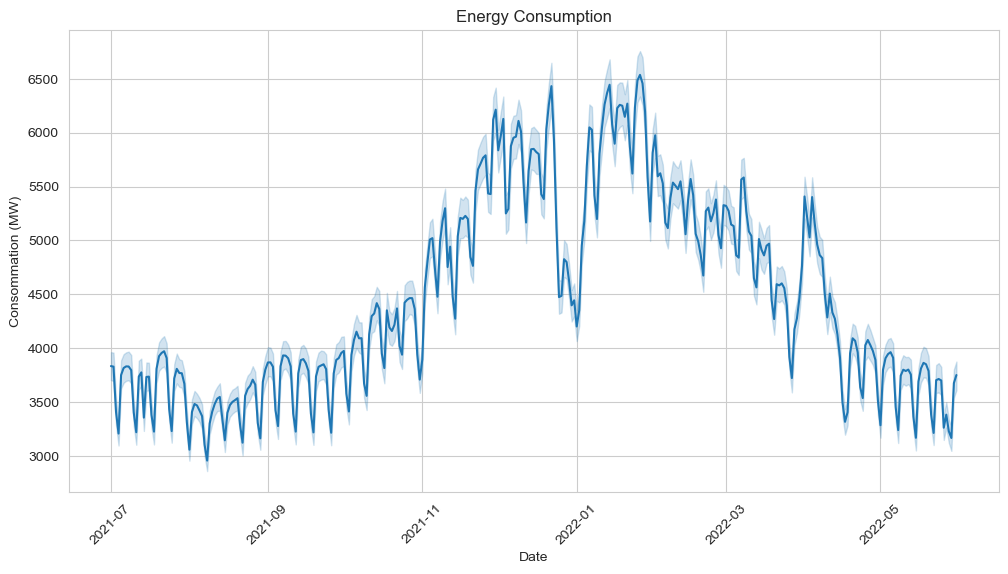

In [15]:
# Plotting the Consommation (MW)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Consommation (MW)", data=df_project)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Consommation (MW)")
plt.xticks(rotation=45)
plt.show()

C:\Users\arask\AppData\Local\Temp\ipykernel_12464\2893087892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['Date - Heure'] = pd.to_datetime(df_project['Date - Heure'], utc=True)
C:\Users\arask\AppData\Local\Temp\ipykernel_12464\2893087892.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['Year'] = df_project['Date - Heure'].dt.year
C:\Users\arask\AppData\Local\Temp\ipykernel_12464\2893087892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

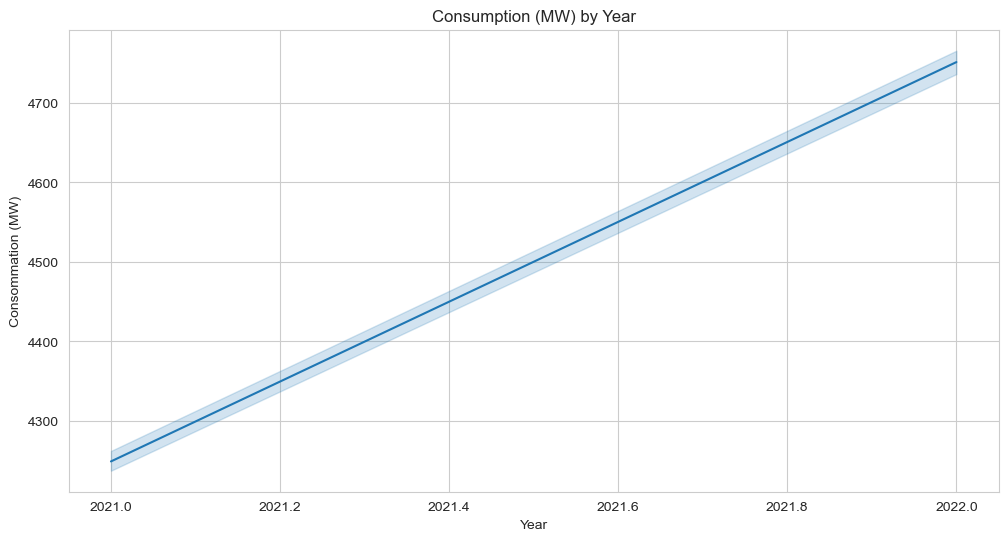

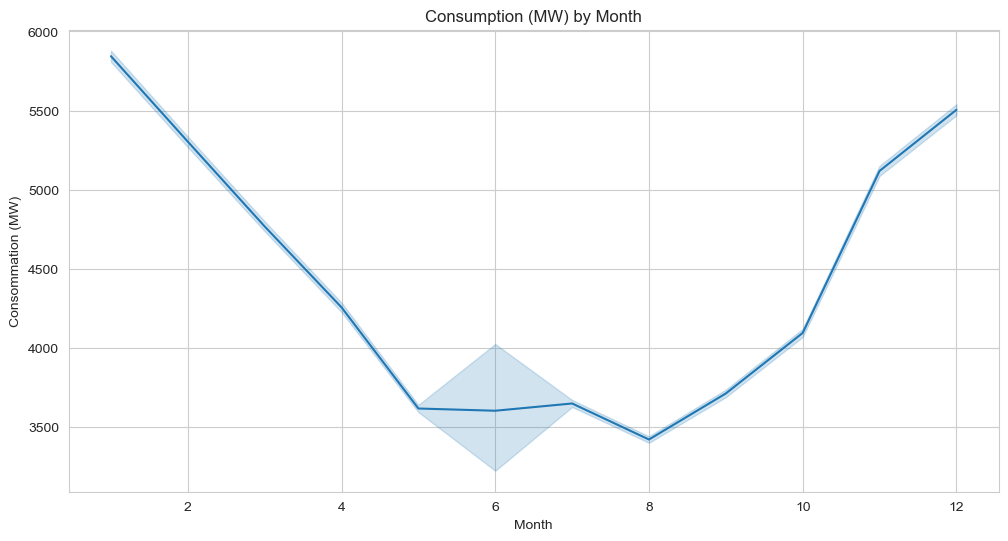

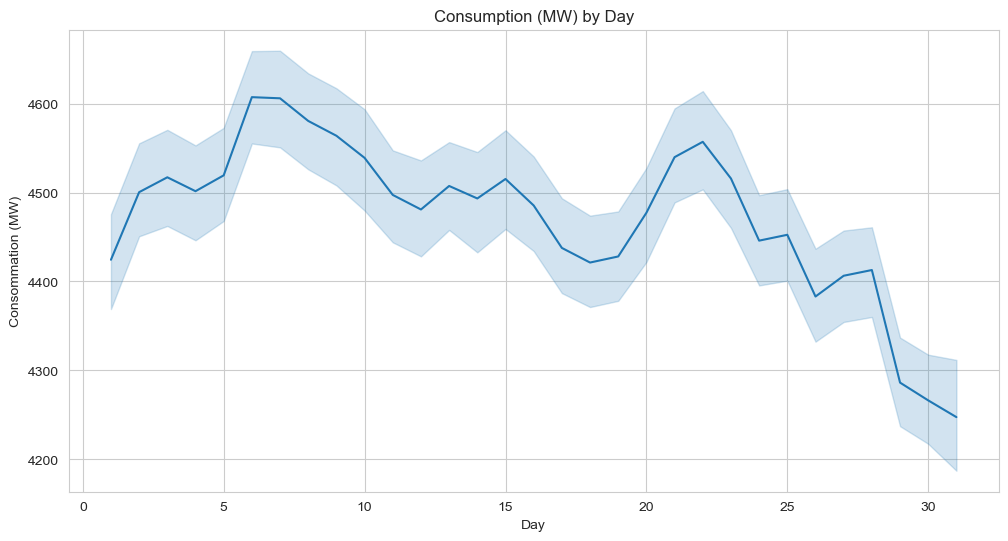

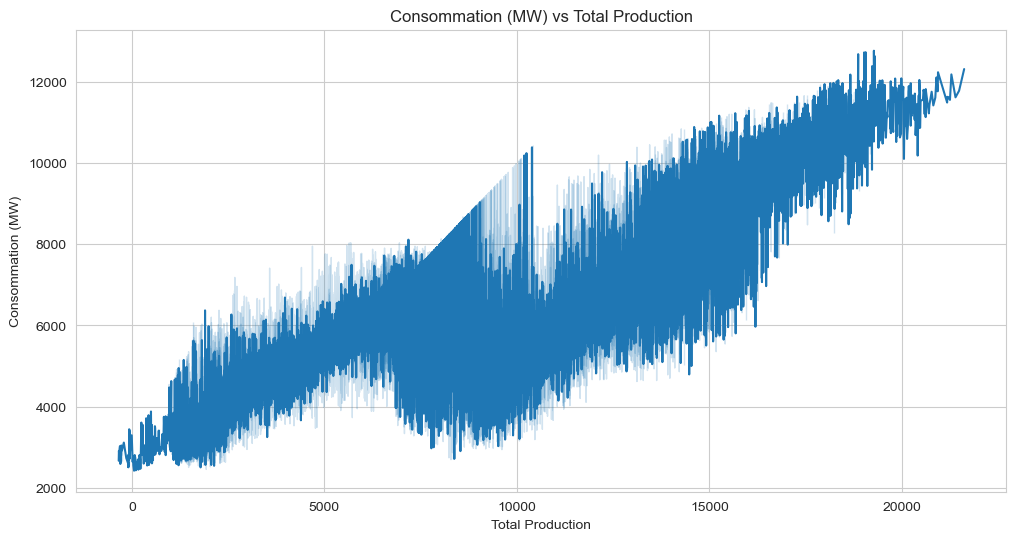

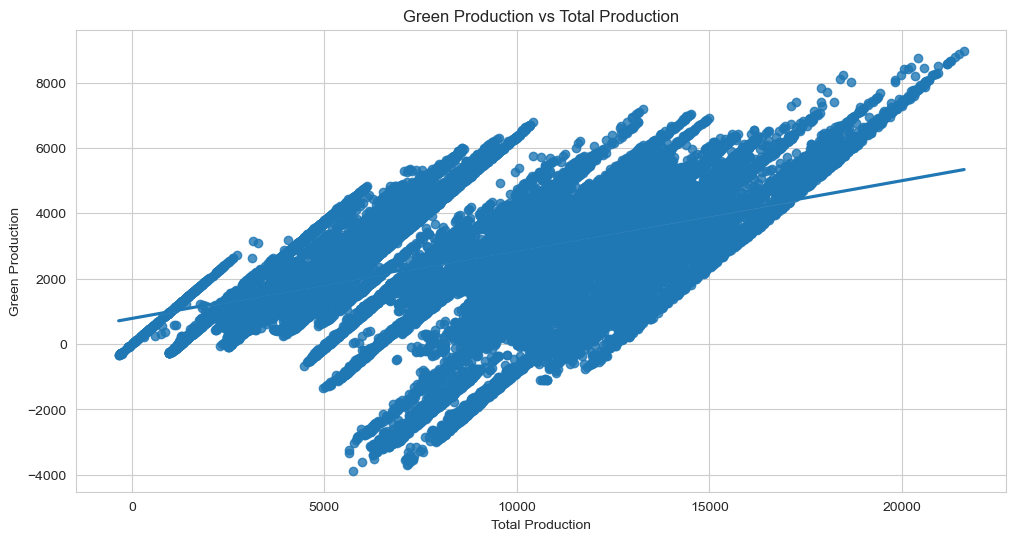

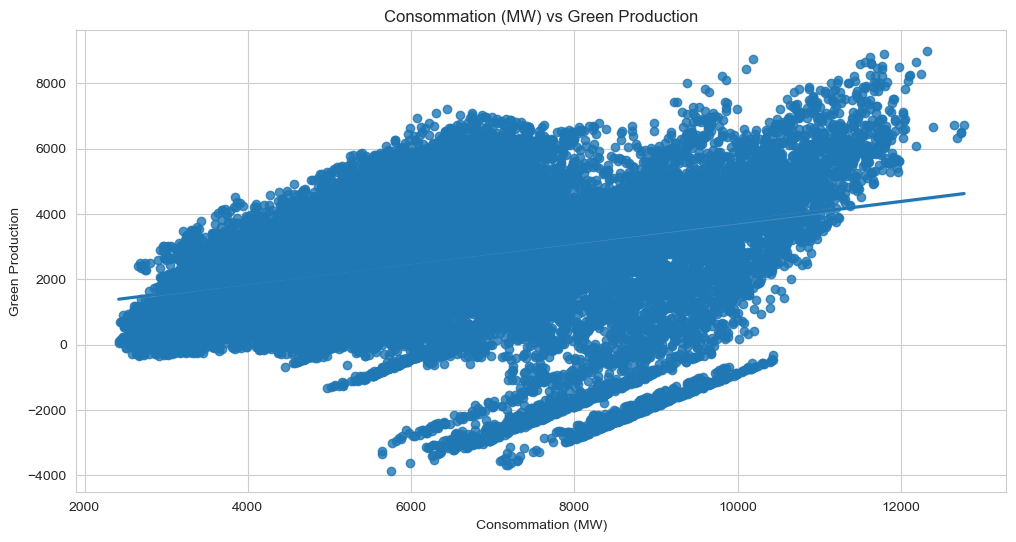

In [16]:
# Convert "Date - Heure" column to datetime with timezone
df_project['Date - Heure'] = pd.to_datetime(df_project['Date - Heure'], utc=True)

# Create year, month, and day variables from the "Date - Heure"
df_project['Year'] = df_project['Date - Heure'].dt.year
df_project['Month'] = df_project['Date - Heure'].dt.month
df_project['Day'] = df_project['Date - Heure'].dt.day

# 'Consommation (MW)' based on year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_project, x='Year', y='Consommation (MW)')
plt.title('Consumption (MW) by Year')
plt.xlabel('Year')
plt.ylabel('Consommation (MW)')
plt.show()

# 'Consommation (MW)' based on month
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_project, x='Month', y='Consommation (MW)')
plt.title('Consumption (MW) by Month')
plt.xlabel('Month')
plt.ylabel('Consommation (MW)')
plt.show()

# 'Consommation (MW)' based on day
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_project, x='Day', y='Consommation (MW)')
plt.title('Consumption (MW) by Day')
plt.xlabel('Day')
plt.ylabel('Consommation (MW)')
plt.show()


In [ ]:
# Plotting the Consommation (MW) vs Total Production
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Total Production", y="Consommation (MW)", data = df_project)
plt.title("Consommation (MW) vs Total Production")
plt.xlabel("Total Production")
plt.ylabel("Consommation (MW)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plotting the Green Production vs Total Production
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.regplot(x="Total Production", y="Green Production", data = df_project)
plt.title("Green Production vs Total Production")
plt.xlabel("Total Production")
plt.ylabel("Green Production")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plotting the Consommation (MW) vs Green Production

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.regplot(x="Total Production", y="Green Production", data = df_project)
plt.title("Consommation (MW) vs Green Production")
plt.xlabel("Green Production")
plt.ylabel("Consommation (MW)")
plt.xticks(rotation=45)
plt.show()

TypeError: cannot convert the series to <class 'float'>

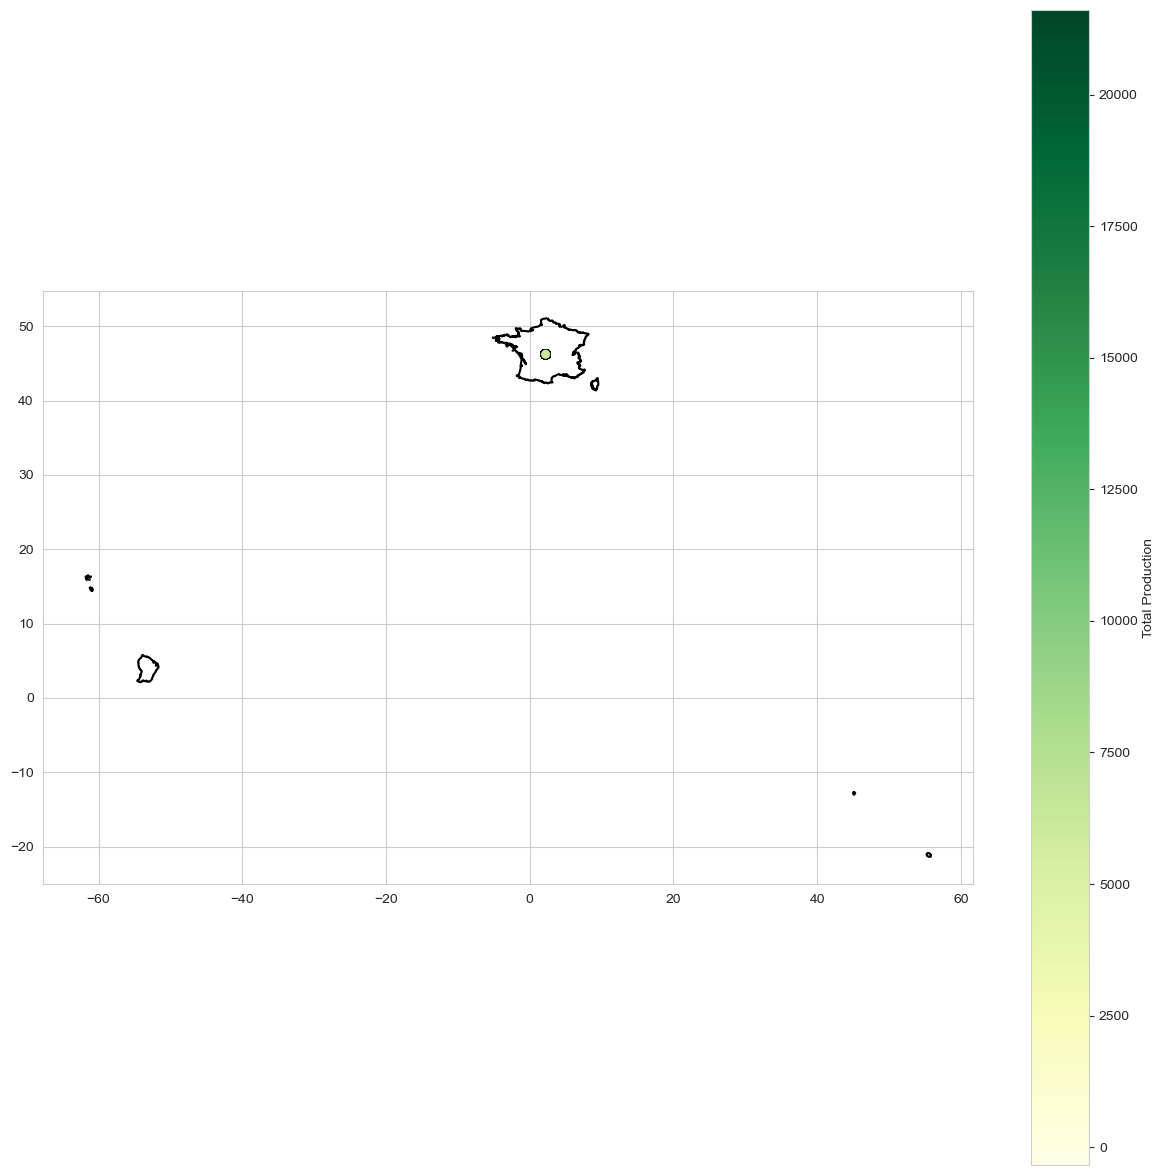

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt

latitude = 46.2276
longitude = 2.2137
df_project = df_project.assign(Latitude=latitude, Longitude=longitude)

# Read the France shapefile 
gdf_france = gpd.read_file("ne_10m_admin_0_countries_fra.shp")

# Filter to get only France
france = gdf_france[gdf_france['ADMIN'] == 'France']

# Create a plot for the map
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the France map
france.boundary.plot(ax=ax, color='black')

# Plot the Total Production data using colors on the map
sc = ax.scatter(df_project['Longitude'], df_project['Latitude'], c=df_project['Total Production'], cmap='YlGn', s=50, edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Total Production')  

# Plot the Consommation (MW) data using markers on the map
df_project.plot(ax=ax, marker='o', facecolors='none', edgecolors='white', markersize=100 * df_project['Consommation (MW)'], label='Consommation (MW)')

# Set the title and labels
ax.set_title("France Map with Total Production and Consommation (MW)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Set the axis limits to zoom in on France
ax.set_xlim(-5, 10)
ax.set_ylim(41, 51)

# Show the plot
plt.legend()
plt.show()

In [21]:
# We need variables for total production and green production with more values
df_project['Total_production_repl (MW)'] = (df_project['Thermique (MW)'].fillna(0) +
                                       df_project['Nucléaire (MW)'].fillna(0) +
                                       df_project['Eolien (MW)'].fillna(0) +
                                       df_project['Solaire (MW)'].fillna(0) +
                                       df_project['Hydraulique (MW)'].fillna(0) +
                                       df_project['Pompage (MW)'].fillna(0) +
                                       df_project['Bioénergies (MW)'].fillna(0) +
                                       df_project['Ech. physiques (MW)'].fillna(0))

df_project['Green Production_repl (MW)'] = df_project['Total_production_repl (MW)'] - df_project['Nucléaire (MW)'].fillna(0)

#df_project.info()

# Pearson test (numerical variables on both sides)
# H0: The production is correlated to the consumption
# H1: The production is not correlated to the consumption

from scipy.stats import pearsonr

result1 = pearsonr(x = df_project['Total_production_repl (MW)'], y = df_project['Consommation (MW)']) 
p_value1 = result1[1]
coefficient1 = result1[0]
print('The p-value is', p_value1, 'and this is smaller then alpa = 0.05. We conclude H0 and reject H1')
print('For all regions there is a correlation between production and consumption')
print('--------------------------------------------------------------------')

# Test can be made with various regions and power sources

def get_correlation(regions):
    alpha = 0.05
    
    for region in regions:
        df_temp = df_project.loc[df_project.Région == region]
        
        print('H0 : For region', region, 'The production is correlated to the consumption')
        print('H1 : For region', region, 'The production is not correlated to the consumption')
        
        coefficient, p_value = pearsonr(x = df_temp['Total_production_repl (MW)'], y = df_temp['Consommation (MW)'])
        
        if p_value < alpha:
            print('The p value', p_value, 'is smaller than alpha, we reject H0 and conclude H1')
            print('For region', region, 'there is a correlation between production and consumption')
        else:
            print('The p value', p_value, 'is bigger than alpha, we conclude H0 and reject H1')
            print('For region', region, 'there is no correlation between production and consumption')
        print('--------------------------------------------------------------------')


get_correlation(df_project.Région.unique())

C:\Users\arask\AppData\Local\Temp\ipykernel_12464\4238386270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['Total_production_repl (MW)'] = (df_project['Thermique (MW)'].fillna(0) +
C:\Users\arask\AppData\Local\Temp\ipykernel_12464\4238386270.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_project['Green Production_repl (MW)'] = df_project['Total_production_repl (MW)'] - df_project['Nucléaire (MW)'].fillna(0)


The p-value is 0.0 and this is smaller then alpa = 0.05. We conclude H0 and reject H1
For all regions there is a correlation between production and consumption
--------------------------------------------------------------------
H0 : For region Bretagne The production is correlated to the consumption
H1 : For region Bretagne The production is not correlated to the consumption
The p value 0.0 is smaller than alpha, we reject H0 and conclude H1
For region Bretagne there is a correlation between production and consumption
--------------------------------------------------------------------
H0 : For region Bourgogne-Franche-Comté The production is correlated to the consumption
H1 : For region Bourgogne-Franche-Comté The production is not correlated to the consumption
The p value 3.484410207285199e-233 is smaller than alpha, we reject H0 and conclude H1
For region Bourgogne-Franche-Comté there is a correlation between production and consumption
----------------------------------------------

In [22]:
# ANOVA test (categorical to numeral variables)
# H0: The consumption is correlated to the region
# H1: The consumption is not correlated to the region
# Test can be made with various power sources

import statsmodels.api 

def get_correlation2(power_sources):
    for source in power_sources:
        
        print('H0 : For power-source', source, 'The production is correlated to the region')
        print('H1 : For power-source', source, 'The production is not correlated to the region')
        
        print(source)
        
        #coefficient, p_value = pearsonr(x = df_temp['Total_production_repl (MW)'], y = df_temp['Consommation (MW)'])
        
        result2 = statsmodels.formula.api.ols(source + ' ~ Région', data = df_project).fit()
        #table2 = statsmodels.api.stats.anova_lm(result2)
        #table2

get_correlation2(df_project.columns[7:15])

# H0: The production is correlated to the month
# H1: The production is not correlated to the month
# Test can be made with various regions and power sources

def get_correlation3(regions):
    alpha = 0.05
    for region in regions:
        df_temp = df_project.loc[df_project.Région == region]
        
        


get_correlation3(df_project.Région.unique())

H0 : For power-source Thermique (MW) The production is correlated to the region
H1 : For power-source Thermique (MW) The production is not correlated to the region
Thermique (MW)


PatsyError: Error evaluating factor: NameError: name 'Thermique' is not defined
    Thermique (MW) ~ Région
    ^^^^^^^^^^^^^^

In [ ]:
# Merge spatial information dataframe into df

# Step 2 of DataVizualization :
plot of Consumption VS total production/green total production
map with GeoPandas
correlation matrix
pieplot of the total production by kind of production
# Step 3 of Preprocessing :
deal with the NA values : delete columns with more than 75% of NA
do variable selection : create a dataframe with only the variables you want to use for the prediction ie the useful variables (depending on you, depending on the correlation and depending on the NA). For example, you can remove nature (not useful), code (not useful), TCO variables (too many NA values) etc. If you keep all the productions variables, you can also remove "total production" and "total green production" to escape redundancy of information
add useful variables from other dataframes (meteo for instance)
The goal is to obtain a dataframe clean and ready for the Modelling, with only the variables that you will use for the prediction of the consumption.